# <center> Раздел 2. Модуль 5. Визуализация данных

In [15]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center> Графические возможности библиотеки plotly
    

Библиотека plotly является сравнительно новым коммерческим продуктом с бесплатной версией, который создавался специально для Data Science, в отличие от старенького matplotlib, который изначально разрабатывался для научных вычислений. 
Библиотека позволяет строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени. К тому же в библиотеке собрано огромнейшее количество красочных методов визуализации, приятный дизайн и несколько способов работы с ней.
С помощью plotly можно делать сложные визуализации с элементами управления. Например, строить интерактивную 3D-визуализацию, карту мира и многое другое. 


In [16]:
#!pip install plotly

Plotly позволяет строить графики в нескольких режимах. Мы рассмотрим самый новый и подающий надежды - экспресс режим, он имеет чуть меньшую функциональность, чем полный режим plotly, но нам его хватит с головой. Для работы в нем предназначен модуль plotly.express.


In [23]:
import plotly
import plotly.express as px
plotly.__version__

'5.3.1'

Рассмотрим процесс визуализации на примере. Посмотрим, как выглядит линейный график, построенный с помощью метода line() из модуля express. В документации к методу приведено пару десятков параметров этого метода (они схожи с параметрами других методов), приведем основные из них:
* data_frame - ну собственно DataFrame, по которому строим график
* x - признак по оси абсцисс
* y - признак по оси ординат
* height - высота графика
* width - ширина графика
* title - название графика

Построим на рост зафиксированного числа случаев заражения (confirmed), смертей (deaths), выздоровлений(recovered) и активных случаев(active) за все время. Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().


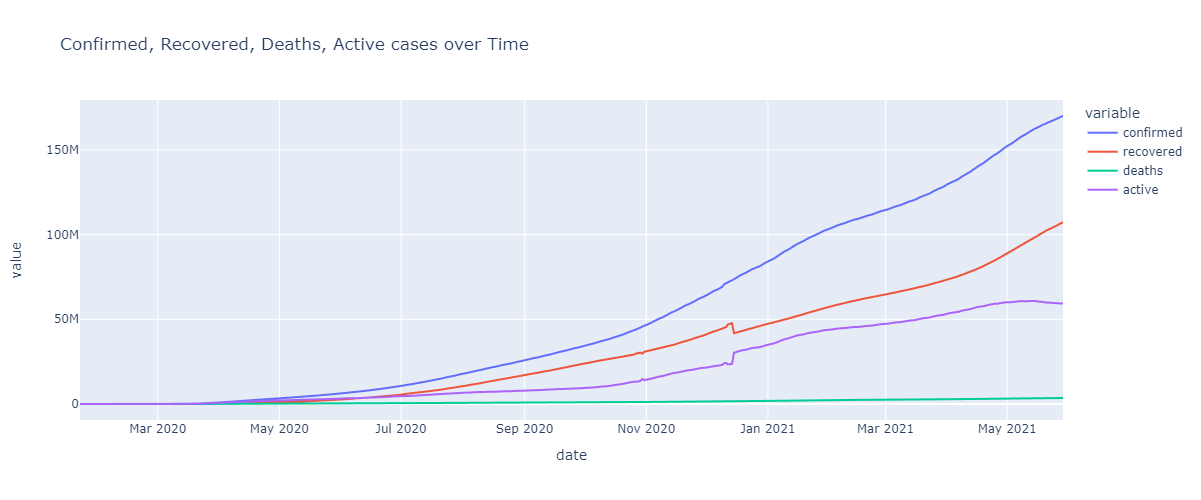

In [24]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #датафрейм
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

Еще пример: построим столбчатую диаграмму показывающую топ 10 стран по среднему проценту выздоравливающих пациентов (recover_rate). Для этого используем метод bar() модуля express. Добавим пару параметров:
* color - группирующий признак, в соответствии с которым будет различная раскраска для столбцов диаграммы
* text - текст, который будет подписан на столбцах диаграммы
* orientation - ориентация графика ('v' - вертикальная, 'h' - горизонтальная)


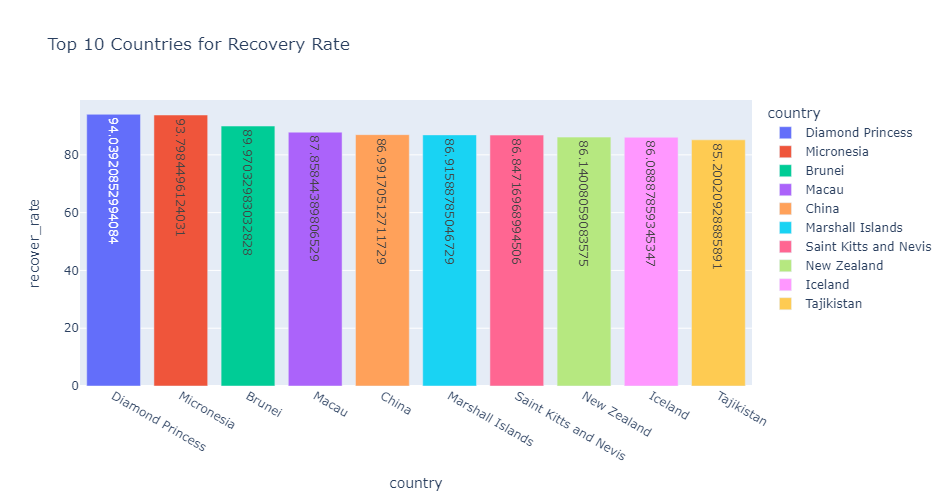

In [19]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

А теперь построим что-нибудь новенькое, специфичное для библиотеки plotly. Например график treemap() (древесная или иерархическая диаграмма). Такой график используется для исследования показателя, когда число возможных категорий велико (например, число стран в таблице covid_df).

Основные параметры метода treemap():
* data_frame - ну собственно DataFrame, по которому строим график
* path - категориальные признаки (их может быть несколько), в разрезе которых строится диаграмма
* values - показатель, по которому рассчитываются размеры прямоугольников

Построим иерархическую диаграмму для среднего ежедневного показателя выздоровевших пациентов (daily_recovered) во всех странах. 


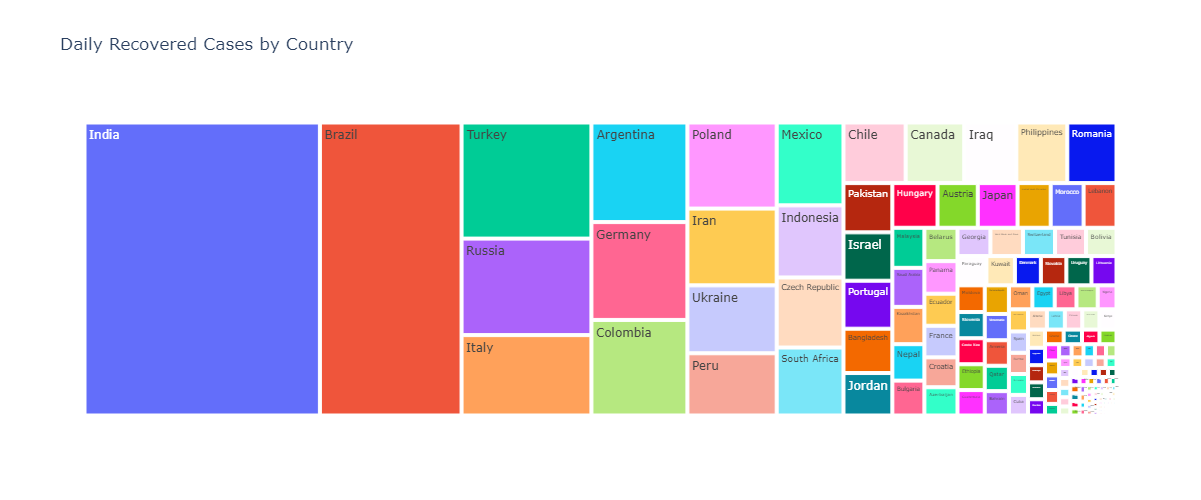

In [25]:
#считаем среднюю ежедневную заболеваемость по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #датафрейм
    path=['country'], #кат. признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=700, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем его
fig.show()

С помощью plotly.express можно строить даже анимированные графики. Например, для нашей задачи отлично подойдет график под названием choropleth() (тепловая картограмма) - это тепловая карта, которая строится на географической карте мира. Чтобы показать, как изменяется значение показателя на карте во времени можно добавить анимацию в график.
Отличительные параметры метода choropleth():
* data_frame - ну вы поняли
* locations - название столбца из которого берутся локации (столбец со странами или регионами)
* locationmode - режим геопривязки, определяет как будет производиться сопоставление данных с картой в plotly (возможно сопоставление по название страны - "country_name" - или по её трёхзначному шифру согласно по ее международному стандарту "ISO-3")
* range_color - диапазон изменения цвета
* animation_frame - анимирующий признак, изменяя который мы получаем анимацию
* color_continuous_scale - цветовая палитра



In [4]:
#преобразуем даты в строки
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный ползунок
    range_color=[0, 30e6],
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

NameError: name 'covid_df' is not defined

Построим 3D-диаграмму рассеяния, которая покажет, как число ежедневно обнаруживаемых случаев и число ежедневных смертей влияют на желание людей вакцинироваться. Для того, чтобы нам было проще рассматривать диаграмму (точки будут более сгруппированы) построим ее в логарифмическом масштабе по осям абсцисс и ординат.
Для построения такой диаграммы используем метод scatter_3d(). Добавим парочку параметров:
* z - параметр по оси аппликат
* log_x - установка логарифмического масштаба по оси x 
* log_y - установка логарифмического масштаба по оси y

Для того, чтобы не захламить график, будем строить зависимость только в нескольких странах: США, России, Великобритании, Бразилии и Франции. Наблюдения для каждой страны окрасим разными цветами.


In [3]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #датафрейм 
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700,
    title='Peoples vaccinations cases daily deaths'
)

#отображаем его
fig.show()
fig.write_html("plotly/scatter_3d.html")


NameError: name 'covid_df' is not defined